#  Business Case: Netflix - Data Exploration and Visualisation

### About NETFLIX

- Netflix is one of the most popular media and video streaming platforms. They have over 8807 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. Here we have Netflix data untill mid 2021 ,we need to analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.The given data has the following informations

### Business Problem

- Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('netflix.csv')
#making a copy of data for any quick reference
df1=df.copy()


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.iloc[1441]

show_id                                                     s1442
type                                                        Movie
title                                               Hello Brother
director                                              Sohail Khan
cast            Salman Khan, Arbaaz Khan, Rani Mukerji, Johny ...
country                                                     India
date_added                                    2021-01-04 00:00:00
release_year                                                 1999
rating                                                      TV-14
duration                                                  126 min
listed_in       Action & Adventure, Comedies, International Mo...
Name: 1441, dtype: object

In [6]:
df.shape

(8807, 12)

#### so the dataset has 8807 rows of data and have 12 columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


There are some columns such as director,cast,country,date_added,rating,duration where the data is null values so we need to treat it

#### Here we have Netflix data untill mid 2021 ,we have 8807 movie/TV Show which we need to analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.The given data has the following informations

- Show_id: Unique ID for every Movie / Tv Show
- Type: Identifier - A Movie or TV Show
- Title: Title of the Movie / Tv Show
- Director: Director of the Movie
- Cast: Actors involved in the movie/show
- Country: Country where the movie/show was produced
- Date_added: Date it was added on Netflix
- Release_year: Actual Release year of the movie/show
- Rating: TV Rating of the movie/show
- Duration: Total Duration - in minutes or number of seasons
- Listed_in: Genre
- Description: The summary description

### Here we don't have the data on popularity , watch time or trp hence we can't analyse the consumer preferances  Based on this data we can only analyze the best of genre, cast ,director and respective market place

1.1 here we have nested data in the 'country','cast','country','listed_in' columns;

1.2 release year is in int64 format

1.3 date_added is in the string or object format

1.4 durations are there in min or hour for the movies and for the series it's present in the seasons

1.5 description data is not necessary for the analysis so we can drop this data

In [8]:
df=df.drop('description',axis=1)

In [9]:
## date_added needs to be converted in the datetime format
df['date_added']=pd.to_datetime(df['date_added'])

In [10]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


#### -> there are nested data in the director,cast, country and listed_in

### Null value in the dataset

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
dtype: int64

- there are 2634 movies and  series where the director is not known ,important point is that we can,t fill these null values with any name or anything bacause that will change the dynamics of  our data for analysing  the best of directors so we can replace it with the string 'NA' to apply the split function on the director column to covert it into the list of nested data then only we can apply the explode method on the director column 
- In 825 movies/series the cast data is missing and there are 831 movies or series where the location or the country of the series/movies is not known

In [545]:
df['director']=df['director'].fillna('NA')
## we can also do it for more than one column in one go
df.fillna({'cast':'NA','country':'NA','rating':'NA'},inplace=True)  

In [547]:
# df['director']=df['director'].fillna('NA')
df['director'].isnull().sum()

0

In [546]:
# as tha whole data in director column is in the string datatype  so we can now convert the nested data to list
df['director']=df['director'].str.split(',')

## we can also use  the apply the lembda function method to convert the nested data to list
df['cast']=df['cast'].apply(lambda x:x.split(','))
df['country']=df['country'].apply(lambda x:x.split(','))
df['listed_in']=df['listed_in'].apply(lambda x:x.split(','))

The explode method in pandas is used to transform a column that contains lists or arrays of values into multiple rows, duplicating the index labels of the original DataFrame for each element in the lists or arrays. This can be especially useful when dealing with data in which a single row represents multiple items or categories.

In [548]:
## now we can apply the explode method on the director column to unnest the director data for the analysis
df = df.explode('director',ignore_index=True)
df = df.explode('cast' ,ignore_index=True)
df = df.explode('country', ignore_index=True)
df = df.explode('listed_in', ignore_index=True)

In [549]:
# removing any extra spaces
df['director']=df['director'].apply(lambda x:x.strip())
df['cast']=df['cast'].apply(lambda x:x.strip())
df['country']=df['country'].apply(lambda x:x.strip())
df['listed_in']=df['listed_in'].apply(lambda x:x.strip())

In [550]:
# renaming listed_in as genre
df.rename(columns={'listed_in':'genre'}, inplace=True)

In [551]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows
2,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas
3,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries
4,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows


In [552]:
# In the duration column i need the numerical value for the analysis so i will extract the numerical value by the following method
df['duration']=df['duration'].str.split().str[0]   # selecting only the first element from the data  
df['duration']=df['duration'].fillna('0')  # here i filled the value with 0 but during duration analysis its converted to mode
df['duration']=df['duration'].apply(lambda x:int(x)) # making the duration column as integer 


### now we have duration in numerical form for the series it represents the no of seasons and for the movies it is representing the duration in minutes 

In [553]:
# simplifying the name of ratings for our analysis
replace_dict = {'PG-13': 'over 13 ', 'TV-MA': 'adult','PG':"parental guidance",'TV-14':'over 14','TV-PG':"parental guidance",
                'TV-Y':'children','TV-Y7':'children aged 7','R':'adult','TV-G': "General Audience",'G': "General Audience", 
                'NC-17':'adult', 'NR':'non-rated', 'NA':'non-rated', 'TV-Y7-FV':'children aged 7', 'UR':"General Audience",
                '74 min':'non-rated', '84 min':'non-rated','66 min':'non-rated'  }

# Replace values in column 'B' using the dictionary
df['rating'] = df['rating'].replace(replace_dict)

In [554]:
## storing the final prepared table for any quick reference
df2=df.copy()
## from here onward we will refer df2 for the clean data

## correlation

In [555]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,over 13,90,Documentaries
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,adult,2,International TV Shows
2,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,adult,2,TV Dramas
3,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,adult,2,TV Mysteries
4,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,adult,2,International TV Shows


In [556]:
df2.corr()

C:\Users\sonuk\AppData\Local\Temp\ipykernel_9156\1778878097.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,release_year,duration
release_year,1.000000,-0.304398
duration,-0.304398,1.000000


C:\Users\sonuk\AppData\Local\Temp\ipykernel_9156\301275377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=.5)


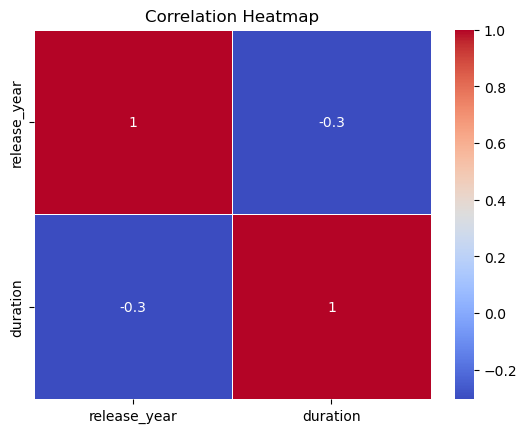

In [557]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

as there is just two numerical columns i.e; release_year and duration so the correlation is showing to 1 between the self column and for correlation between duration and release year its -0.3 so over time duration have decreased

## count of movies and tv series          

In [558]:
dfc=df2[['title','type','country']] # taking only the title,type,country column from the clean table df2

dfc=dfc.drop_duplicates().reset_index(drop=True) #removing any duplicates from the required table

In [559]:
dfc['country'].value_counts().head(10)

United States     3690
India             1046
NA                 831
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: country, dtype: int64

### top10 countries

In [560]:
a=dfc['country'].value_counts().head(11)   # taking only top 10 country but as 'NA' value is in it so taking 11

dfc=dfc[(dfc['country'].isin(a.index)) &(dfc['country'] != 'NA') ]  # data of only top 10 country

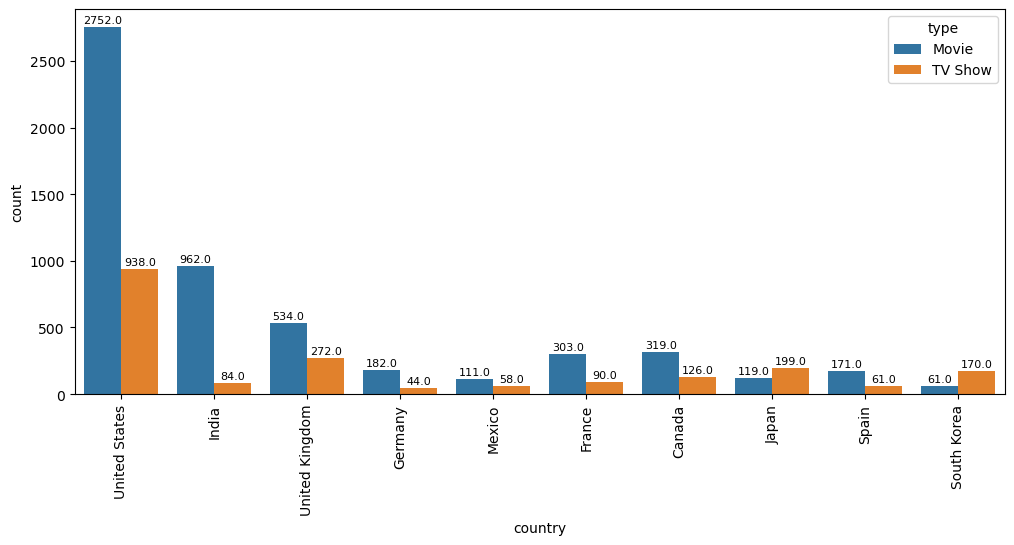

In [561]:
plt.figure(figsize=(12,5))
ax=sns.countplot(data=dfc,x='country',hue='type')
plt.xticks(rotation=90)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

best markets for the netflix content are:-
- United States     
- India             
- United Kingdom     
- Canada   
- France
- Japan
- Spain
- South korea
    

## top 10 actors

In [562]:
cast_data=df2[['title','cast']]

cast_data= cast_data.drop_duplicates().reset_index(drop=True)

cast_data=cast_data['cast'].value_counts()

cast_data=cast_data[cast_data.index!='NA']

cast_data_10=cast_data.head(10)

In [563]:
cast_data.head(10)

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: cast, dtype: int64

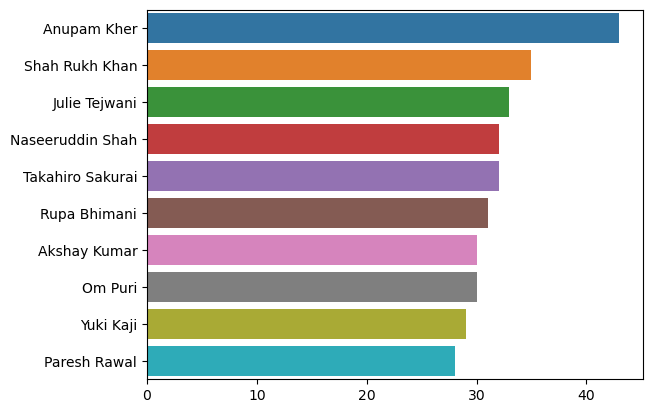

In [564]:
sns.barplot(x=cast_data_10.values,y=cast_data_10.index)
plt.show()

These are the best actors as per the no of movies/tv show
- Julie Tejwani          
- Rupa Bhimani           
- Anupam Kher            
- Nawazuddin Siddiqui    
- Rajesh Kava            
- Andrea Libman          
- Akshay Kumar

### top 10 actor in last 15 year

In [565]:
# last 15 year movies data
dfm_10yr=df2[(df2['release_year']>2010) & (df2['release_year']<2022) & (df2['type']=='Movie') ]

In [566]:
cast_data=dfm_10yr[['title','cast']]

cast_data= cast_data.drop_duplicates().reset_index(drop=True)

cast_data=cast_data['cast'].value_counts()

cast_data=cast_data[cast_data.index!='NA']

cast_data_10=cast_data.head(10)

In [567]:
cast_data_10

Julie Tejwani          24
Rupa Bhimani           23
Anupam Kher            19
Nawazuddin Siddiqui    18
Rajesh Kava            17
Andrea Libman          17
Akshay Kumar           16
Rajesh Sharma          16
Boman Irani            15
Jigna Bhardwaj         15
Name: cast, dtype: int64

In [568]:
df2[df2['cast']=='Julie Tejwani'].head(5) 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre
990,s40,TV Show,Chhota Bheem,NA,Julie Tejwani,India,2021-09-16,2021,children aged 7,3,Kids' TV
2006,s90,TV Show,Mighty Raju,NA,Julie Tejwani,NA,2021-09-09,2017,children aged 7,4,Kids' TV
10055,s406,Movie,Chhota Bheem - Dinosaur World,Sidheswar Shukla,Julie Tejwani,NA,2021-07-22,2015,children,65,Children & Family Movies
10059,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,Julie Tejwani,NA,2021-07-22,2013,children aged 7,64,Children & Family Movies
10066,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,Julie Tejwani,NA,2021-07-22,2009,children aged 7,68,Children & Family Movies


### ## here we can see that Julie Tejwani is related to child cartoon character chota bheem

## top 10 actor in the us market

In [569]:
cast_country_data=df2[['type','title','cast','country']]

cast_country_data=cast_country_data.drop_duplicates()

us_cast=cast_country_data[cast_country_data['country']=='United States']
us_cast=us_cast[us_cast['cast']!='NA']

In [570]:
us_cast['cast'].nunique()

15100

In [571]:
usplot=us_cast['cast'].value_counts().head(10)
usplot

Tara Strong          22
Samuel L. Jackson    22
Fred Tatasciore      21
Adam Sandler         20
James Franco         19
Nicolas Cage         19
Morgan Freeman       18
Seth Rogen           18
Molly Shannon        17
Erin Fitzgerald      16
Name: cast, dtype: int64

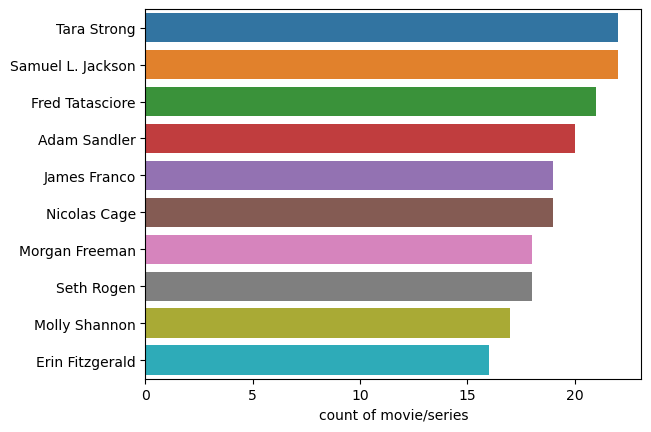

In [572]:
sns.barplot(x=usplot.values,y=usplot.index)
plt.xlabel('count of movie/series')
plt.show()

these are the best actors of usa market:-
- Tara Strong          
- Samuel L. Jackson    
- Fred Tatasciore      
- Adam Sandler         
- James Franco         

## top 10 director analysis

### for movies

In [573]:
dfd=df2[['type','title','director']]
dfd=dfd[dfd['type']=='Movie']
dfd=dfd.drop_duplicates().reset_index(drop=True)       # dropping the duplicates of the title and director pair
dfd=dfd[dfd['director']!='NA']                         # removing the NA values for the analysis
dfd.head(5)

,type,title,director
0,Movie,Dick Johnson Is Dead,Kirsten Johnson
1,Movie,My Little Pony: A New Generation,Robert Cullen
2,Movie,My Little Pony: A New Generation,José Luis Ucha
3,Movie,Sankofa,Haile Gerima
4,Movie,The Starling,Theodore Melfi


In [574]:
# taking only top 10 directors
count=dfd['director'].value_counts().head(10)
dfd=dfd[dfd['director'].isin(count.index)]
dfd['director'].value_counts()

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Jay Karas              15
Marcus Raboy           15
Cathy Garcia-Molina    13
Youssef Chahine        12
Martin Scorsese        12
Jay Chapman            12
Name: director, dtype: int64

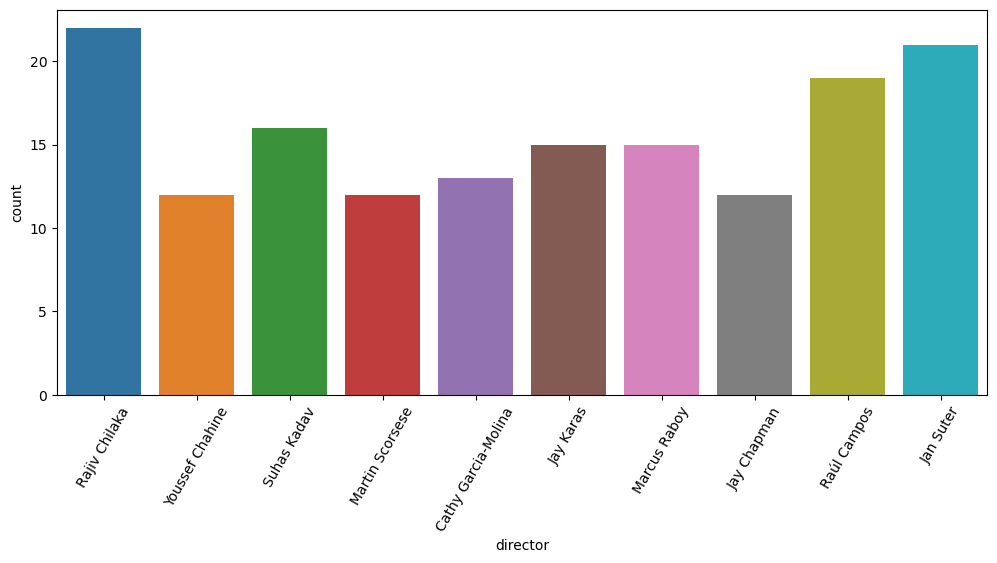

In [575]:
plt.figure(figsize=(12,5))
sns.countplot(data=dfd,x='director')
plt.xticks(rotation=60)
plt.show()

for movies top 5 directors are 
- Rajiv Chilaka          
- Jan Suter              
- Raúl Campos            
- Suhas Kadav            
- Jay Karas  


### for series

In [576]:
dfd=df2[['type','title','director']]
dfd=dfd[dfd['type']=='TV Show']
dfd=dfd.drop_duplicates().reset_index(drop=True)       # dropping the duplicates of the title and director pair
dfd=dfd[dfd['director']!='NA']                         # removing the NA values for the analysis
dfd.head(5)

,type,title,director
1,TV Show,Ganglands,Julien Leclercq
4,TV Show,Midnight Mass,Mike Flanagan
5,TV Show,The Great British Baking Show,Andy Devonshire
7,TV Show,Bangkok Breaking,Kongkiat Komesiri
12,TV Show,Monsters Inside: The 24 Faces of Billy Milligan,Olivier Megaton


In [577]:
# taking only top 10 directors
count=dfd['director'].value_counts().head(10)
count


Alastair Fothergill      3
Ken Burns                3
Jung-ah Im               2
Gautham Vasudev Menon    2
Iginio Straffi           2
Hsu Fu-chun              2
Stan Lathan              2
Joe Berlinger            2
Shin Won-ho              2
Lynn Novick              2
Name: director, dtype: int64

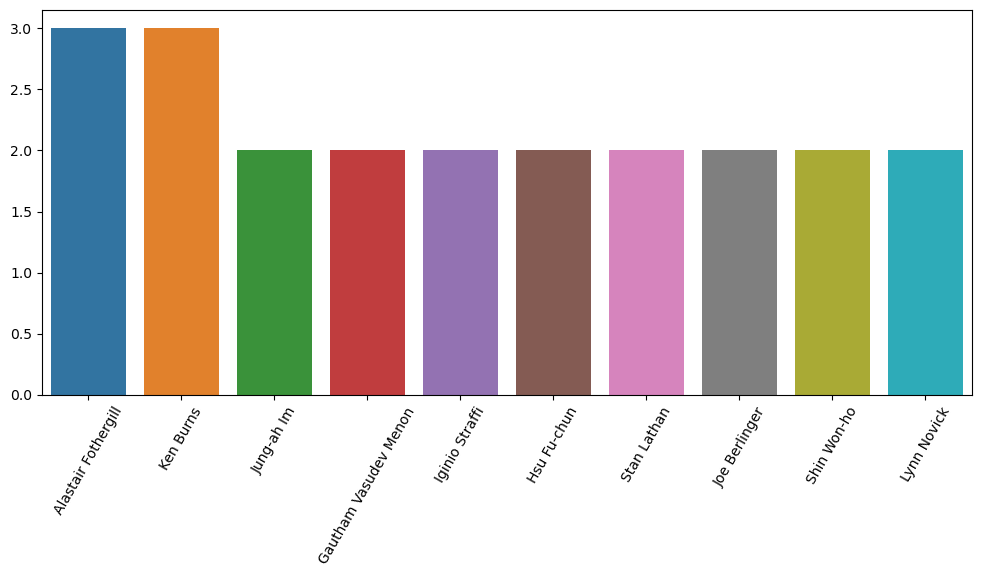

In [578]:
plt.figure(figsize=(12,5))
sns.barplot(x=count.index,y=count.values)
plt.xticks(rotation=60)
plt.show()

for series the best directors are 
- Alastair Fothergill  
- Ken Burns
- Jung-ah Im               
- Gautham Vasudev Menon    
- Iginio Straffi 

## top 10 directors for usa

#### As the USA is the biggest market so this analysis is necessary

In [579]:
dfd=df2[['country','title','director']]
dfd=dfd[dfd['country']=='United States']
dfd=dfd.drop_duplicates().reset_index(drop=True)       # dropping the duplicates of the title and director pair
dfd=dfd[dfd['director']!='NA']                         # removing the NA values for the analysis
dfd.head(5)

,country,title,director
0,United States,Dick Johnson Is Dead,Kirsten Johnson
1,United States,Sankofa,Haile Gerima
2,United States,The Starling,Theodore Melfi
4,United States,Grown Ups,Dennis Dugan
5,United States,Dark Skies,Scott Stewart


In [580]:
count=dfd['director'].value_counts().head(10)
count

Jay Karas           15
Marcus Raboy        15
Martin Scorsese     12
Jay Chapman         12
Steven Spielberg    11
Don Michael Paul    10
Shannon Hartman      9
Troy Miller          8
Robert Rodriguez     8
Ryan Polito          8
Name: director, dtype: int64

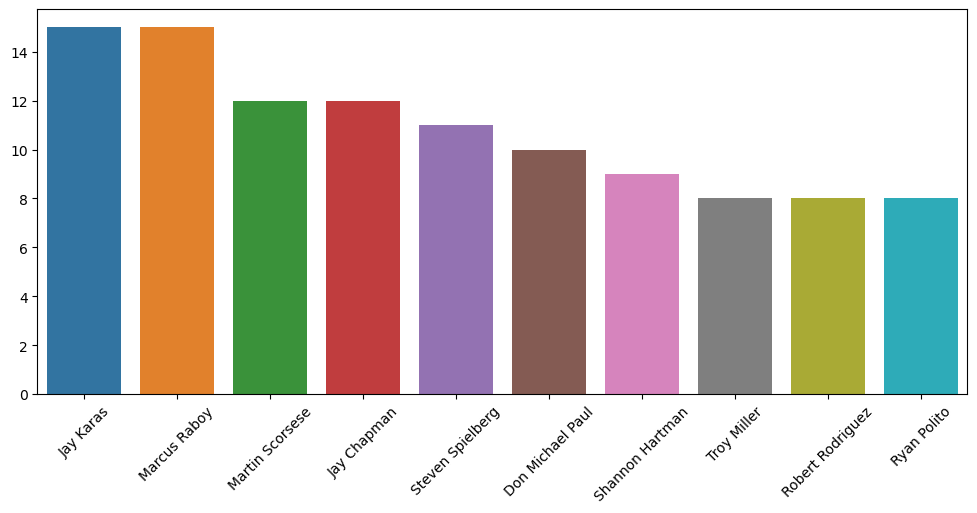

In [581]:
plt.figure(figsize=(12,5))

sns.barplot(x=count.index,y=count.values)
plt.xticks(rotation=45)
plt.show()

'Marcus Raboy', 'Jay Karas','Martin Scorsese','Jay Chapman' and 'Steven Spielberg' are the top directors in usa when seen in terms of number of movies

## year by release of movies and tv shows

In [582]:
release_data=df2[['type','title','release_year']]
release_data=release_data.drop_duplicates().reset_index(drop=True)

In [583]:
release=release_data[release_data['release_year']>2000]

In [584]:
release['release_year'].value_counts().head(10)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

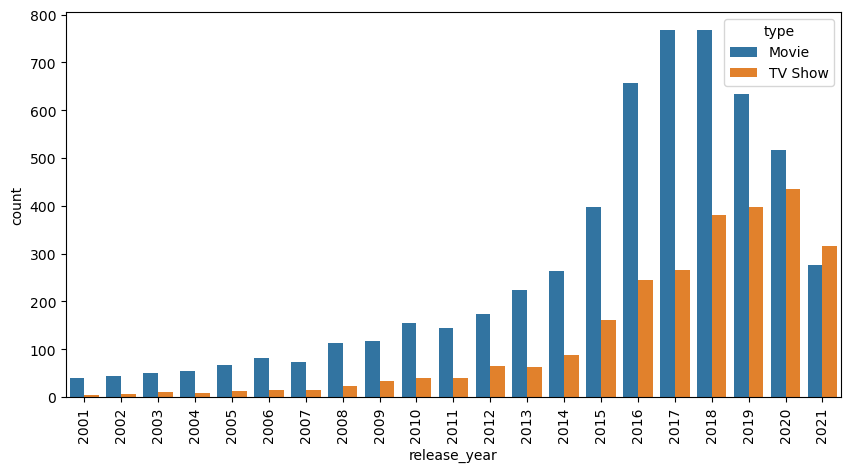

In [585]:
plt.figure(figsize=(10,5))
sns.countplot(data=release, x='release_year', hue='type')
plt.xticks(rotation=90)
plt.show()

if we see the release data we can see a rising trend in both movies and tv series , it decreased in 2019 and 2020 that may be due to the covid effect, moreover TV shows are increasing more rapidly than the movies in recent past

## month by month movie addition

In [586]:
dfmm=df2[['title','type','date_added']]
dfmm=dfmm.drop_duplicates()
dfmm['Month_Name']=dfmm['date_added'].dt.strftime('%B')

In [587]:
dfmm.head(5)

,title,type,date_added,Month_Name
0,Dick Johnson Is Dead,Movie,2021-09-25,September
1,Blood & Water,TV Show,2021-09-24,September
58,Ganglands,TV Show,2021-09-24,September
85,Jailbirds New Orleans,TV Show,2021-09-24,September
87,Kota Factory,TV Show,2021-09-24,September


In [588]:
counts = dfmm.groupby(['Month_Name', 'type']).size().unstack(fill_value=0)

counts

type,Movie,TV Show
Month_Name,,
April,550,214
August,519,236
December,547,266
February,382,181
January,546,192
July,565,262
June,492,236
March,529,213
May,439,193


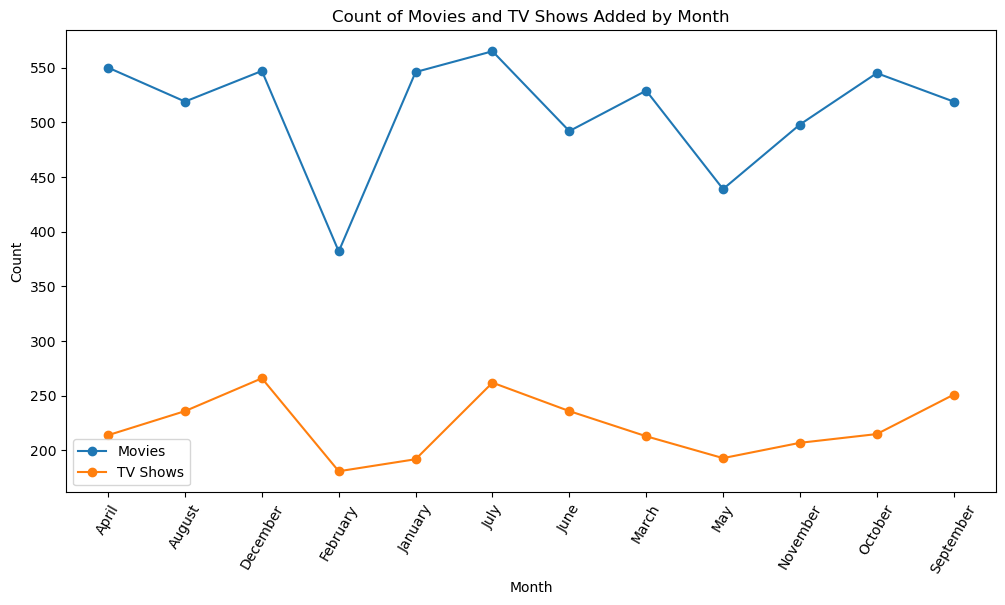

In [589]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(counts.index, counts['Movie'], label='Movies', marker='o')
plt.plot(counts.index, counts['TV Show'], label='TV Shows', marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Count of Movies and TV Shows Added by Month')
plt.xticks(rotation=60)
plt.legend()

 here we can see a similar trend in date_added month wise data  :less movies or tv shows are added in the month of february and more in the month of july

## date_added versus 'genre'

In [590]:
genre_data=df2[['type','title','genre','date_added']]          ## release data means when it is released on netflix
genre_data=genre_data.drop_duplicates().reset_index(drop=True)

### scatterplot :date analysis of genre for movies

In [591]:
genre_m=genre_data [genre_data['type']=='Movie']
genre_m['genre'].value_counts().head()

International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: genre, dtype: int64

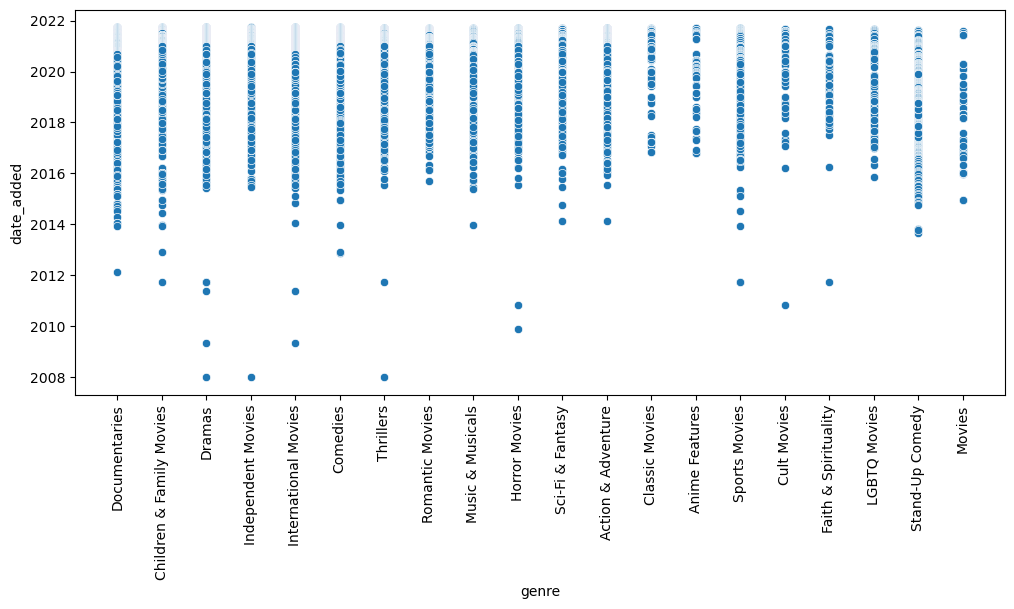

In [592]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=genre_m,y='date_added',x='genre')
plt.xticks(rotation=90)
plt.show()

### date analysis of  genre for TV Shows

In [593]:
genre_t=genre_data [ genre_data['type']=='TV Show']
genre_t['genre'].value_counts().head()

International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Name: genre, dtype: int64

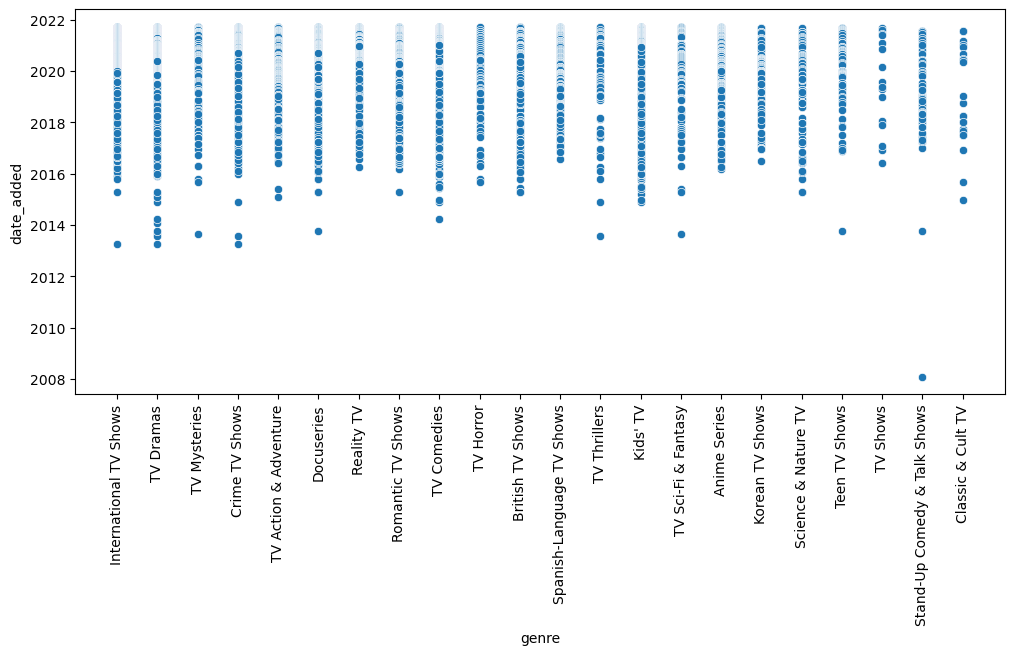

In [594]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=genre_t,y='date_added',x='genre')
plt.xticks(rotation=90)
plt.show()

most of the genre are on increasing trend but the top 5 genre  in movies are :
- International Movies    
- Dramas                  
- Comedies                
- Documentaries            
- Action & Adventure

top 5 genre in tv show are:
- International TV Shows    
- TV Dramas                  
- TV Comedies                
- Crime TV Shows             
- Kids' TV   

## rating analysis

In [595]:
df2['rating'].nunique()

8

In [596]:
df2['rating'].unique()

array(['over 13 ', 'adult', 'parental guidance', 'over 14', 'children',
       'children aged 7', 'General Audience', 'non-rated'], dtype=object)

In [597]:
dfr=df2[['type','title','rating']]

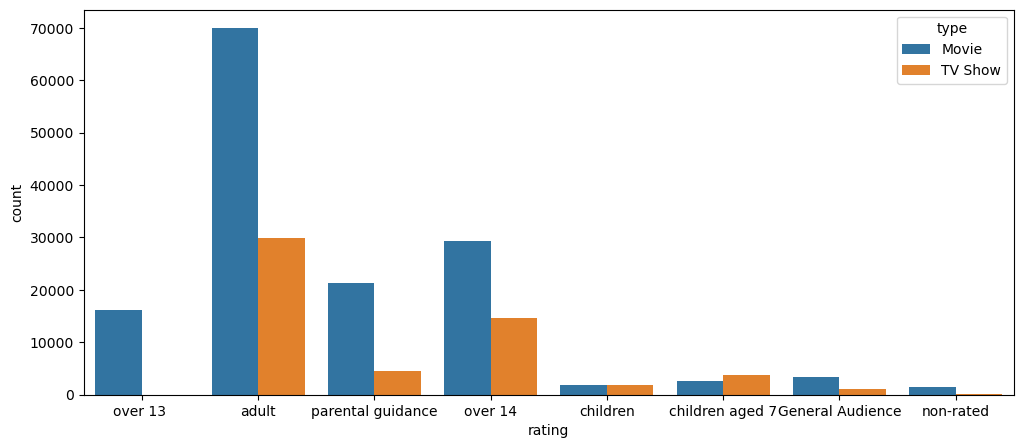

In [598]:
plt.figure(figsize=(12,5))
sns.countplot(data=dfr,x='rating',hue='type')
plt.show()

top categories indicates that the online platforms are targetting the youth and the adult
- adult, 
- parental guidance,
- over14,
- over 13  

In [599]:
rat_count=dfr['rating'].value_counts()
rat_count

adult                99924
over 14              43957
parental guidance    25845
over 13              16246
children aged 7       6390
General Audience      4395
children              3665
non-rated             1643
Name: rating, dtype: int64

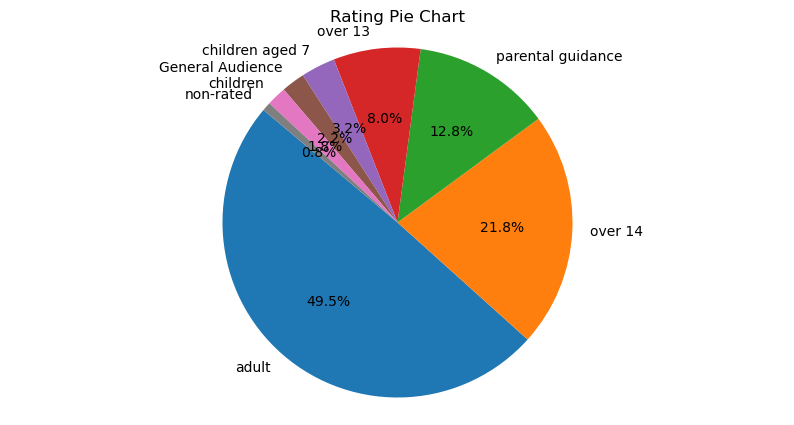

In [600]:
labels = rat_count.index
sizes = rat_count.values # Sizes or proportions of each category

# Create a pie chart
plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Rating Pie Chart')
plt.axis('equal')
plt.show()

top categories for the movies are adult meaning age above 17 or 18, and for the age group of 13 and above

top categories indicates that the online platforms are targetting the youth and the adult
- adult : 49.5%
- parental guidance : 21.8%
- over 14 : 12.8%
- over 13 : 8%

## duration analysis

In [601]:
dur=df2[['type','title','duration']]

In [602]:
dur.dtypes

type        object
title       object
duration     int64
dtype: object

In [603]:
dur[dur['duration']==0]                              ## as earlier we replaced the null value with the 0 which are there in movies only

,type,title,duration
126582,Movie,Louis C.K. 2017,0
131648,Movie,Louis C.K.: Hilarious,0
131782,Movie,Louis C.K.: Live at the Comedy Store,0


In [604]:
mode_value = dur[dur['type']=='Movie']['duration'].mode().iloc[0]   ## getting the mode of duration of the movies

# Replace 0 with the mode value
df['duration'] = df['duration'].replace(0, mode_value)

In [605]:
dur=dur.drop_duplicates().reset_index(drop=True)

In [606]:
dur[dur['type']=='TV Show']['duration'].value_counts().head()

1    1793
2     425
3     199
4      95
5      65
Name: duration, dtype: int64

<Axes: xlabel='type', ylabel='duration'>

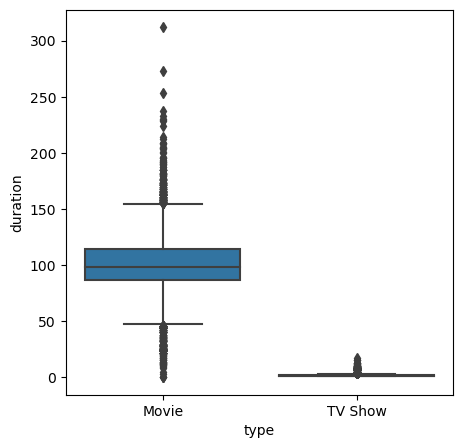

In [607]:
plt.figure(figsize=(5,5))
sns.boxplot(x='type', y='duration', data=dur)

durations of most of the  movies are 50 min to 150 min but there are some movies that are very small .. those are mainly documentries
and most of the series ranges from 1 to 5 seasons, no of season vesus no of tv shows are here

season : no of shows
- 1  :  1793
- 2  :  425
- 3  :  199
- 4  :  95
- 5  :  65
    

##  Business Insights:

### If we see the release data we can see a rising trend in both movies and tv series , it decreased in 2019 and 2020 that may be due to the covid effect, moreover TV shows are increasing more rapidly than the movies in recent past

### movies and TV Shows show similar trend in date_added month wise data  :           less movies or tv shows are added in the month of february and more in the month of july

The complete analysis can be summarized as: 

best markets for the netflix content are:-
- United States     
- India             
- United Kingdom     
- Canada   
- France
- Japan
- Spain
- South korea

These are the best actors as per the no of movies/tv show
- Julie Tejwani          
- Rupa Bhimani           
- Anupam Kher            
- Nawazuddin Siddiqui    
- Rajesh Kava            
- Andrea Libman          
- Akshay Kumar

these are the best actors of usa market:-
- Tara Strong          
- Samuel L. Jackson    
- Fred Tatasciore      
- Adam Sandler         
- James Franco     

for movies top 5 directors are 
- Rajiv Chilaka          
- Jan Suter              
- Raúl Campos            
- Suhas Kadav            
- Jay Karas  

for series the best directors are 
- Alastair Fothergill  
- Ken Burns
- Jung-ah Im               
- Gautham Vasudev Menon    
- Iginio Straffi 

the top directors in usa when seen in terms of number of movies
- 'Marcus Raboy',
- 'Jay Karas',
- 'Martin Scorsese',
- 'Jay Chapman' and
- 'Steven Spielberg'   

most of the genre are on increasing trend but the top 5 genre  in movies are :
- International Movies    
- Dramas                  
- Comedies                
- Documentaries            
- Action & Adventure

top 5 genre in tv show are:
- International TV Shows    
- TV Dramas                  
- TV Comedies                
- Crime TV Shows             
- Kids' TV   

top categories indicates that the online platforms are targetting the youth and the adult
- adult : 49.5%
- parental guidance : 21.8%
- over 14 : 12.8%
- over 13 : 8%

durations of most of the  movies are 50 min to 150 min but there are some movies that are very small .. those are mainly documentries
and most of the series ranges from 1 to 5 seasons, no of season vesus no of tv shows are here

season : no of shows
- 1  :  1793
- 2  :  425
- 3  :  199
- 4  :  95
- 5  :  65

##  Recommendations:

### There is a rising trend in the no. of shows and movies released on Netflix, if we ignore the covid19 period. The rise can be seen in every genre specially in - International Movies ,  Dramas , Comedies , Documentaries, Action & Adventure .If we see the category/age group for the movies or TV show  then we can see that teens and adult centric contents are on the rise.As per the data the biggest markets are USA,India,UnitedKingdom,Canada,France.
### The best actor are - Julie Tejwani  ,Rupa Bhimani,Anupam Kher, Nawazuddin Siddiqui, Rajesh Kava, Andrea Libman, Akshay Kumar . 
### The Best  actor in USA are - - Tara Strong  , Samuel L. Jackson   , Fred Tatasciore, Adam Sandler , James Franco 
### for movies top 5 directors are - Rajiv Chilaka ,Jan Suter,Raúl Campos,Suhas Kadav,Jay Karas  
### for series the best directors are - Alastair Fothergill , Ken Burns, Jung-ah Im ,Gautham Vasudev Menon , Iginio Straffi
### the top directors in usa are:  'Marcus Raboy', 'Jay Karas', 'Martin Scorsese', 'Jay Chapman' and 'Steven Spielberg'  

In [21]:
df=df.explode('cast')

In [28]:
df.loc[df['cast']=='Ama Qamata',['title']]

,title
1,Blood & Water


In [ ]:
df.loc[ ]